# Segmentation Client avec K-Means

Ce notebook vous guide à travers un exercice de clustering avec **K-Means**, 
en utilisant le dataset `Mall Customers` disponible sur Kaggle.

Nous allons analyser les données de clients et les segmenter en groupes pour comprendre leur comportement d'achat.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import plotly.express as px

In [3]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [ ]:
features = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_scaled = pd.DataFrame(features_scaled, columns=features.columns)
features_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [6]:
features_scaled.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


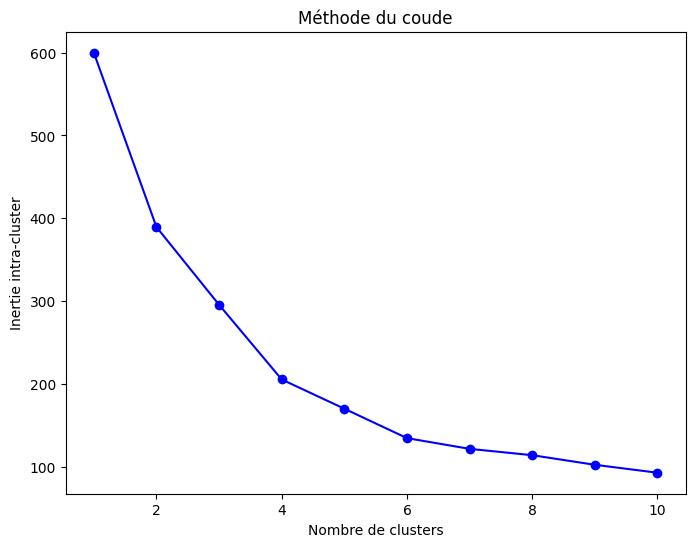

In [ ]:
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertias, "bo-")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie intra-cluster")
plt.title("Méthode du coude")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
data["Cluster"] = kmeans.fit_predict(features_scaled)

centroids = kmeans.cluster_centers_
print("Centroïdes des clusters :\n", centroids)

Centroïdes des clusters :
 [[ 1.25472096 -0.24021294 -0.04399777]
 [-0.44191719  0.99158305  1.23950275]
 [-0.95377931 -1.30081415  1.01091344]
 [-0.91323113 -0.0433223  -0.22322397]
 [ 0.36959845  1.12879725 -1.25264236]
 [ 0.47895722 -1.30822992 -1.19644353]]


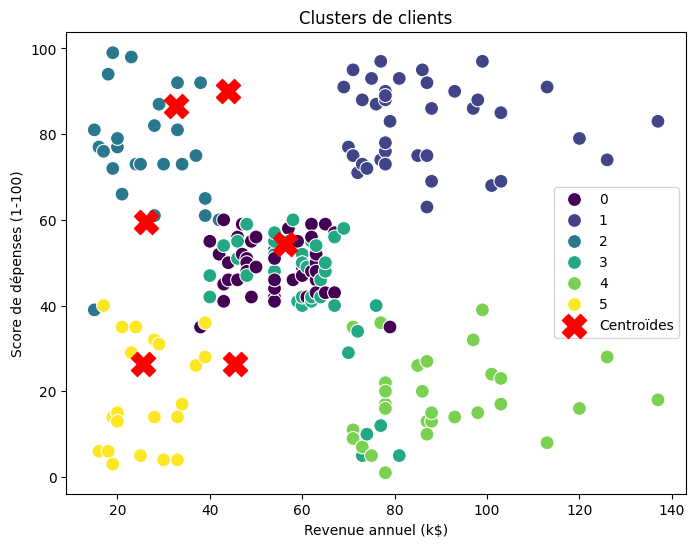

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="viridis",
    s=100,
)
plt.scatter(
    scaler.inverse_transform(centroids)[:, 0],
    scaler.inverse_transform(centroids)[:, 1],
    s=300,
    c="red",
    label="Centroïdes",
    marker="X",
)
plt.title("Clusters de clients")
plt.xlabel("Revenue annuel (k$)")
plt.ylabel("Score de dépenses (1-100)")
plt.legend()
plt.show()

In [ ]:
fig = px.scatter_3d(
    data, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age", color="Cluster"
)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
numeric = list(["Age", "Annual Income (k$)", "Spending Score (1-100)"])
cat = ["Genre"]

num_pipe = StandardScaler()
cat_pipe = OneHotEncoder()

transformer = make_column_transformer((num_pipe, numeric), (cat_pipe, cat))

In [ ]:
features = data[["Genre", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

c:\Users\BStorm\anaconda3\envs\envCondaKeras\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\BStorm\anaconda3\envs\envCondaKeras\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\BStorm\anaconda3\envs\envCondaKeras\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\BStorm\anaconda3\envs\envCondaKeras\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is k

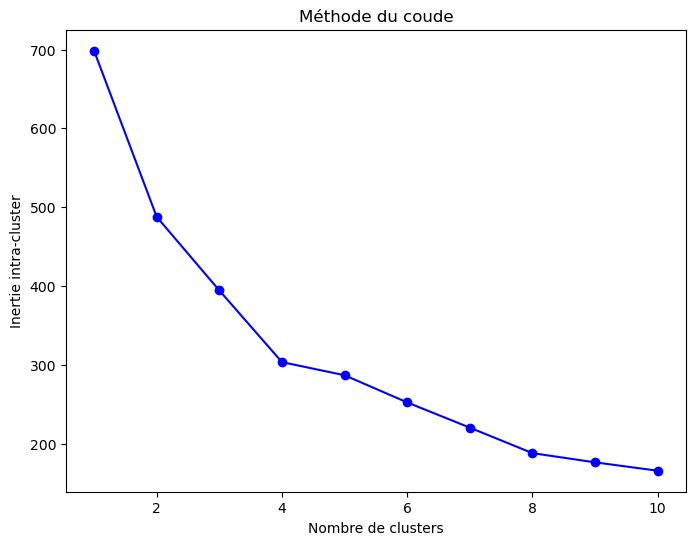

In [ ]:
centroids = []
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    model = make_pipeline(transformer, kmeans)
    model.fit(features)
    # inertias.append(  model.inertia_)
    centroids.append(kmeans.cluster_centers_)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertias, "bo-")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie intra-cluster")
plt.title("Méthode du coude")
plt.show()

In [ ]:
model4Cluster = make_pipeline(transformer, KMeans(n_clusters=4, random_state=42))
data["Cluster4"] = model4Cluster.fit_predict(features)
model8Cluster = make_pipeline(transformer, KMeans(n_clusters=8, random_state=42))
data["Cluster8"] = model8Cluster.fit_predict(features)

c:\Users\BStorm\anaconda3\envs\envCondaKeras\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\BStorm\anaconda3\envs\envCondaKeras\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [ ]:
fig = px.scatter_3d(
    data,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    z="Age",
    color="Cluster4",
    symbol="Genre",
)
fig.show()


In [ ]:
fig = px.scatter_3d(
    data,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    z="Age",
    color="Cluster8",
    symbol="Genre",
)
fig.show()
